In [35]:
# cnn y-net: multit input CNN
import numpy as np

from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.datasets import mnist


In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

image_size = x_train.shape[1]

x_train = np.reshape(x_train,[-1, image_size, image_size, 1])

x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [38]:
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = 0.4
n_filters = 32

In [39]:
# left branch
left_inputs = Input(shape=input_shape)
x = left_inputs
filters = n_filters
for i in range(3):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

In [41]:
# right branch
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
for i in range(3):
    y = Conv2D(filters=filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *=2

In [42]:
# left, right 결합
y = concatenate([x,y])
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)
# input에 2개의 데이터가 전달됨
model = Model([left_inputs, right_inputs], outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 28, 28, 32)           320       ['input_10[0][0]']            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 28, 28, 32)           320       ['input_12[0][0]']            
                                                                                              

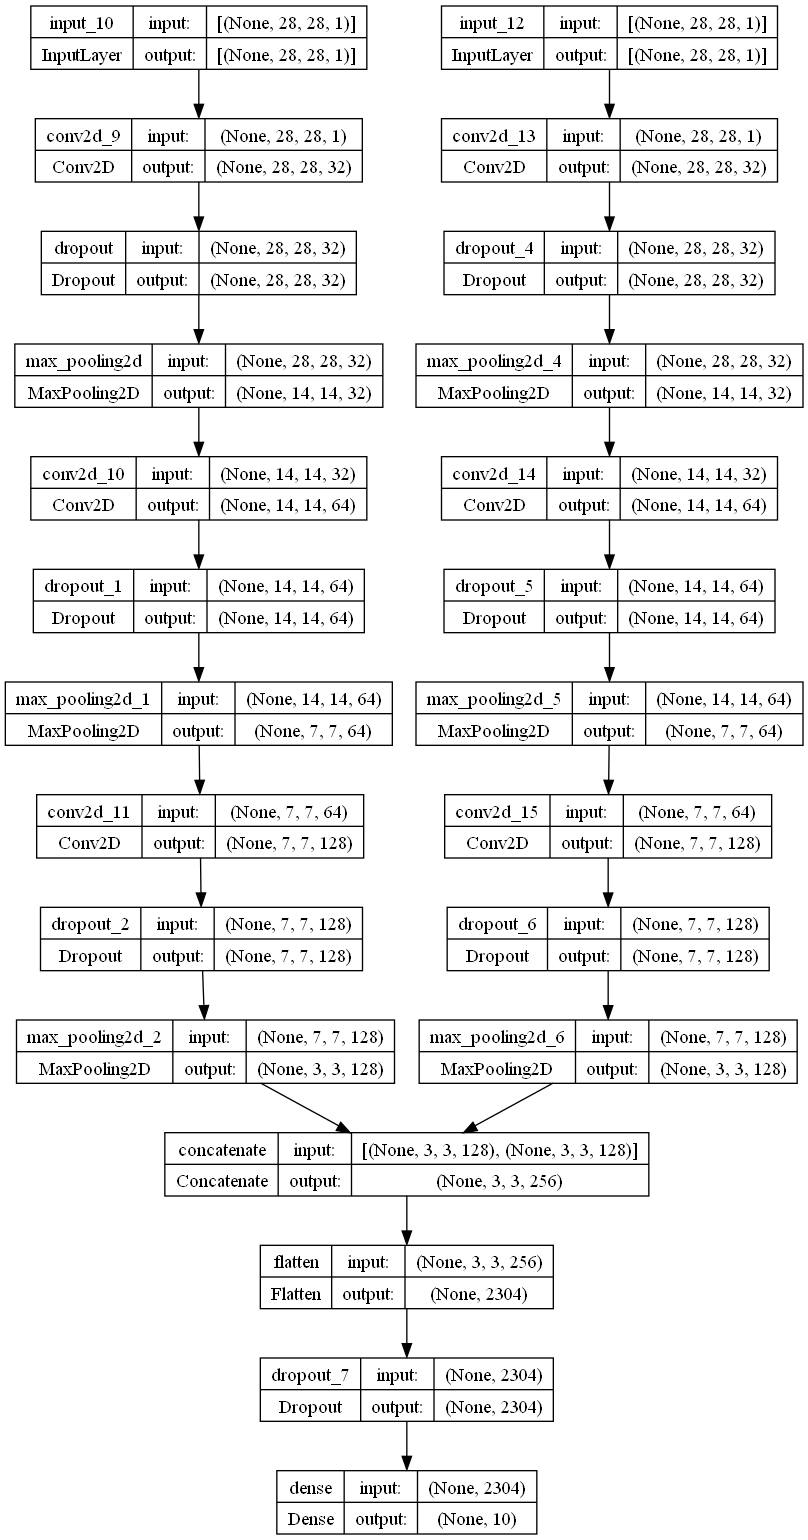

In [44]:
plot_model(model, to_file='cnn-y-netowrk.png', show_shapes=True)

In [45]:
model.fit([x_train, x_train],
y_train,
validation_data=([x_test, x_test], y_test),
epochs=2,
batch_size=batch_size)

Epoch 1/2
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1695 - accuracy: 0.9461 - val_loss: 0.1299 - val_accuracy: 0.9879
Epoch 2/2
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.1205 - val_accuracy: 0.9914


In [46]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)
print('\nTest accuracy: %.1f%%' %(100.0 * score[1]))

313/313 [==============================] - 4s 11ms/step - loss: 0.1205 - accuracy: 0.9914

Test accuracy: 99.1%
